## The Problem Statement

<p style="font-size:16px; color:#000099"> - Nifty Bees is the ETF of Nifty <br> 
- It is difficult to have a clear price discovery of Nifty Bees because of relatively low liquidity <br>
- Hence this analysis tries to find the relation of Nifty Bees ETF and Nifty50 for efficient price discovery.</p>

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)

import numpy as np
import yfinance as yf

import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')
plt.rcParams['figure.figsize'] = (8, 5)

In [2]:
start_date = '2010-04-01' 
end_date = '2022-03-31'

In [3]:
bees = yf.download('NIFTYBEES.NS', start=start_date, end=end_date, interval='1d', auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [4]:
nifty = yf.download('^NSEI', start=start_date, end=end_date, interval='1d', auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [5]:
nifty.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2010-04-01,5249.2002,5298.6001,5249.2002,5290.5000,0
2010-04-05,5291.3999,5377.5498,5291.3999,5368.3999,0
2010-04-06,5369.6499,5388.6499,5351.7002,5366.0000,0
2010-04-07,5365.7002,5399.6499,5345.0498,5374.6499,0
2010-04-08,5376.2998,5383.6499,5290.2500,5304.4502,0
2010-04-09,5302.3999,5377.4502,5302.2500,5361.7500,0
2010-04-12,5354.1499,5382.1499,5324.8999,5339.7002,0
2010-04-13,5340.8501,5356.5000,5301.7002,5322.9502,0
2010-04-15,5323.2998,5373.1499,5265.2998,5273.6001,0


In [6]:
bees.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2010-04-01,53.0150,53.1000,52.7850,53.1000,400
2010-04-05,53.1000,53.8450,53.1000,53.8450,6660
2010-04-06,53.7500,53.7500,53.2050,53.4000,250
2010-04-07,53.3000,54.0500,53.1000,53.4300,5670
2010-04-08,50.1500,53.7100,50.1500,53.1500,3860
2010-04-09,52.5000,53.7500,52.5000,53.0550,800
2010-04-12,53.6000,53.8000,53.1000,53.1000,80
2010-04-13,53.0500,53.3000,52.8050,53.0100,660
2010-04-15,53.2000,53.5950,52.9400,52.9400,2690


In [7]:
bees.rename(columns={'Open': 'Open_Bees', 'High': 'High_Bees', 'Low': 'Low_Bees', 'Close': 'Close_Bees', 'Volume': 'Volume_Bees'}, inplace=True)

In [8]:
nifty.rename(columns={'Open': 'Open_Nifty', 'High': 'High_Nifty', 'Low': 'Low_Nifty', 'Close': 'Close_Nifty', 'Volume': 'Volume_Nifty'}, inplace=True)

In [9]:
bees.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2961 entries, 2010-04-01 to 2022-03-30
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open_Bees    2961 non-null   float64
 1   High_Bees    2961 non-null   float64
 2   Low_Bees     2961 non-null   float64
 3   Close_Bees   2961 non-null   float64
 4   Volume_Bees  2961 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 138.8 KB


In [10]:
nifty.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2942 entries, 2010-04-01 to 2022-03-30
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open_Nifty    2942 non-null   float64
 1   High_Nifty    2942 non-null   float64
 2   Low_Nifty     2942 non-null   float64
 3   Close_Nifty   2942 non-null   float64
 4   Volume_Nifty  2942 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 137.9 KB


In [11]:
bees.describe()

,Open_Bees,High_Bees,Low_Bees,Close_Bees,Volume_Bees
count,2961.0000,2961.0000,2961.0000,2961.0000,2961.0000
mean,93.8030,94.4730,92.1256,93.0906,868622.8588
std,38.7049,38.9653,36.5902,37.3244,1258718.1533
min,12.9200,13.0330,12.9050,13.0200,0.0000
25%,59.9339,60.1000,59.7000,59.9034,215330.0000
50%,84.8000,85.4000,84.3020,84.7420,454530.0000
75%,114.0500,114.8670,113.2680,114.0800,1023080.0000
max,223.0000,223.0000,197.9900,198.9100,19565577.0000


We notice that the minimum volumne is 0 which cannot happen on a trading in practical scenario. Hence we will drop those data points if they are not a significant part of data 

In [12]:
nifty.describe()

,Open_Nifty,High_Nifty,Low_Nifty,Close_Nifty,Volume_Nifty
count,2942.0000,2942.0000,2942.0000,2942.0000,2942.0000
mean,8995.9479,9042.2916,8933.4061,8988.8235,230386.0299
std,3364.6483,3376.7697,3342.3428,3361.2667,223111.4681
min,4623.1499,4623.1499,4531.1499,4544.2002,0.0000
25%,5934.9502,5971.0500,5889.4000,5934.8375,101625.0000
50%,8399.9004,8445.2500,8341.1753,8382.7998,178900.0000
75%,10904.6624,10956.2627,10831.8623,10893.1377,301650.0000
max,18602.3496,18604.4492,18445.3008,18477.0508,1811000.0000


In [13]:
bees = bees[bees.Volume_Bees != 0] # The volume of NiftyBEES cannot be 0

In [14]:
bees.describe()

,Open_Bees,High_Bees,Low_Bees,Close_Bees,Volume_Bees
count,2798.0000,2798.0000,2798.0000,2798.0000,2798.0000
mean,95.8128,96.5218,94.0376,95.0589,919225.2627
std,38.8777,39.1152,36.7414,37.4620,1276781.7852
min,12.9200,13.0330,12.9050,13.0200,80.0000
25%,61.4563,61.7940,60.8150,61.2827,247432.5000
50%,86.8575,87.3125,86.3600,86.7845,485625.0000
75%,115.9367,116.5000,114.3365,115.6578,1082755.0000
max,223.0000,223.0000,197.9900,198.9100,19565577.0000


In [15]:
nifty.describe()

,Open_Nifty,High_Nifty,Low_Nifty,Close_Nifty,Volume_Nifty
count,2942.0000,2942.0000,2942.0000,2942.0000,2942.0000
mean,8995.9479,9042.2916,8933.4061,8988.8235,230386.0299
std,3364.6483,3376.7697,3342.3428,3361.2667,223111.4681
min,4623.1499,4623.1499,4531.1499,4544.2002,0.0000
25%,5934.9502,5971.0500,5889.4000,5934.8375,101625.0000
50%,8399.9004,8445.2500,8341.1753,8382.7998,178900.0000
75%,10904.6624,10956.2627,10831.8623,10893.1377,301650.0000
max,18602.3496,18604.4492,18445.3008,18477.0508,1811000.0000


In [16]:
merged = bees.merge(nifty, left_index=True, right_index=True, how='inner')

In [17]:
merged

,Open_Bees,High_Bees,Low_Bees,Close_Bees,Volume_Bees,Open_Nifty,High_Nifty,Low_Nifty,Close_Nifty,Volume_Nifty
Date,,,,,,,,,,
2010-04-01,53.0150,53.1000,52.7850,53.1000,400,5249.2002,5298.6001,5249.2002,5290.5000,0
2010-04-05,53.1000,53.8450,53.1000,53.8450,6660,5291.3999,5377.5498,5291.3999,5368.3999,0
2010-04-06,53.7500,53.7500,53.2050,53.4000,250,5369.6499,5388.6499,5351.7002,5366.0000,0
2010-04-07,53.3000,54.0500,53.1000,53.4300,5670,5365.7002,5399.6499,5345.0498,5374.6499,0
2010-04-08,50.1500,53.7100,50.1500,53.1500,3860,5376.2998,5383.6499,5290.2500,5304.4502,0
...,...,...,...,...,...,...,...,...,...,...
2022-03-24,198.0000,198.0000,177.8000,186.0900,2232760,17094.9492,17291.7500,17091.1504,17222.7500,290300
2022-03-25,187.1200,187.1200,185.0000,185.8200,5968779,17289.0000,17294.9004,17076.5508,17153.0000,237100
2022-03-28,188.2000,188.2000,184.3000,186.3200,3218703,17181.8496,17235.0996,17003.9004,17222.0000,253200


In [18]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2781 entries, 2010-04-01 to 2022-03-30
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open_Bees     2781 non-null   float64
 1   High_Bees     2781 non-null   float64
 2   Low_Bees      2781 non-null   float64
 3   Close_Bees    2781 non-null   float64
 4   Volume_Bees   2781 non-null   int64  
 5   Open_Nifty    2781 non-null   float64
 6   High_Nifty    2781 non-null   float64
 7   Low_Nifty     2781 non-null   float64
 8   Close_Nifty   2781 non-null   float64
 9   Volume_Nifty  2781 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 239.0 KB


In [19]:
merged['Open_Factor'] = merged['Open_Nifty']/merged['Open_Bees']
merged['High_Factor'] = merged['High_Nifty']/merged['High_Bees']
merged['Low_Factor'] = merged['Low_Nifty']/merged['Low_Bees']
merged['Close_Factor'] = merged['Close_Nifty']/merged['Close_Bees']

In [20]:
nifty_typical_price = (merged['High_Nifty'] + merged['Low_Nifty'] + merged['Close_Nifty'])/3
bees_typical_price = (merged['High_Bees'] + merged['Low_Bees'] + merged['Close_Bees'])/3
merged['Typical_Factor'] = nifty_typical_price/bees_typical_price

In [21]:
merged.head(10)

,Open_Bees,High_Bees,Low_Bees,Close_Bees,Volume_Bees,Open_Nifty,High_Nifty,Low_Nifty,Close_Nifty,Volume_Nifty,Open_Factor,High_Factor,Low_Factor,Close_Factor,Typical_Factor
Date,,,,,,,,,,,,,,,
2010-04-01,53.0150,53.1000,52.7850,53.1000,400,5249.2002,5298.6001,5249.2002,5290.5000,0,99.0135,99.7853,99.4449,99.6328,99.6214
2010-04-05,53.1000,53.8450,53.1000,53.8450,6660,5291.3999,5377.5498,5291.3999,5368.3999,0,99.6497,99.8709,99.6497,99.7010,99.7410
2010-04-06,53.7500,53.7500,53.2050,53.4000,250,5369.6499,5388.6499,5351.7002,5366.0000,0,99.9005,100.2540,100.5864,100.4869,100.4418
2010-04-07,53.3000,54.0500,53.1000,53.4300,5670,5365.7002,5399.6499,5345.0498,5374.6499,0,100.6698,99.9010,100.6601,100.5924,100.3821
2010-04-08,50.1500,53.7100,50.1500,53.1500,3860,5376.2998,5383.6499,5290.2500,5304.4502,0,107.2044,100.2355,105.4885,99.8015,101.7664
2010-04-09,52.5000,53.7500,52.5000,53.0550,800,5302.3999,5377.4502,5302.2500,5361.7500,0,100.9981,100.0456,100.9952,101.0602,100.6965
2010-04-12,53.6000,53.8000,53.1000,53.1000,80,5354.1499,5382.1499,5324.8999,5339.7002,0,99.8909,100.0400,100.2806,100.5593,100.2922
2010-04-13,53.0500,53.3000,52.8050,53.0100,660,5340.8501,5356.5000,5301.7002,5322.9502,0,100.6758,100.4972,100.4015,100.4141,100.4377
2010-04-15,53.2000,53.5950,52.9400,52.9400,2690,5323.2998,5373.1499,5265.2998,5273.6001,0,100.0620,100.2547,99.4579,99.6147,99.7777


In [22]:
merged.tail(10)

,Open_Bees,High_Bees,Low_Bees,Close_Bees,Volume_Bees,Open_Nifty,High_Nifty,Low_Nifty,Close_Nifty,Volume_Nifty,Open_Factor,High_Factor,Low_Factor,Close_Factor,Typical_Factor
Date,,,,,,,,,,,,,,,
2022-03-16,183.6000,183.8000,181.8000,183.6600,2288980,16876.6504,16987.9004,16837.8496,16975.3496,260000,91.9208,92.4260,92.6174,92.4281,92.4901
2022-03-17,188.0000,188.0000,185.2000,186.7100,4130440,17202.9004,17344.5996,17175.7500,17287.0508,448300,91.5048,92.2585,92.7416,92.5877,92.5281
2022-03-21,190.0000,190.0000,182.0000,185.3800,2590277,17329.5000,17353.3496,17096.4004,17117.5996,285500,91.2079,91.3334,93.9363,92.3379,92.5174
2022-03-22,189.0000,193.7500,184.2000,187.3400,2606331,17120.4004,17334.4004,17006.3008,17315.5000,338300,90.5841,89.4679,92.3252,92.4282,91.3800
2022-03-23,190.0000,190.0000,185.0000,186.3400,2584326,17405.0508,17442.4004,17199.5996,17245.6504,292100,91.6055,91.8021,92.9708,92.5494,92.4353
2022-03-24,198.0000,198.0000,177.8000,186.0900,2232760,17094.9492,17291.7500,17091.1504,17222.7500,290300,86.3381,87.3321,96.1257,92.5506,91.8430
2022-03-25,187.1200,187.1200,185.0000,185.8200,5968779,17289.0000,17294.9004,17076.5508,17153.0000,237100,92.3953,92.4268,92.3057,92.3098,92.3477
2022-03-28,188.2000,188.2000,184.3000,186.3200,3218703,17181.8496,17235.0996,17003.9004,17222.0000,253200,91.2957,91.5786,92.2621,92.4324,92.0887
2022-03-29,190.0000,190.0000,184.1500,187.2200,2197933,17297.1992,17343.6504,17235.6992,17325.3008,235100,91.0379,91.2824,93.5960,92.5398,92.4607


In [23]:
merged[['Open_Factor', 'High_Factor', 'Low_Factor', 'Close_Factor', 'Typical_Factor']].describe()

,Open_Factor,High_Factor,Low_Factor,Close_Factor,Typical_Factor
count,2781.0000,2781.0000,2781.0000,2781.0000,2781.0000
mean,97.3505,97.1404,98.0519,97.7041,97.6147
std,22.5630,22.5080,22.8552,22.7652,22.6777
min,79.0620,79.4250,85.0122,88.1432,88.2598
25%,95.0375,94.6646,95.5021,95.0767,95.0256
50%,98.0619,97.9766,98.1782,98.0597,98.0565
75%,99.0072,98.9110,99.0371,98.9341,98.9461
max,946.0836,941.3297,944.6843,941.6052,942.5330


In [24]:
for i in ['Open_Factor', 'High_Factor', 'Low_Factor', 'Close_Factor', 'Typical_Factor']:
    print(f"{i} 99.99% tile ==={merged[i].quantile(q=0.999)}")

Open_Factor 99.99% tile ===117.76475395260516
High_Factor 99.99% tile ===101.191348678722
Low_Factor 99.99% tile ===118.81040536078007
Close_Factor 99.99% tile ===104.85024207165495
Typical_Factor 99.99% tile ===106.60362478039016


In [25]:
ls1 = []
ls2 = []
ls3 = []
ls4 = []
ls5 = []

for i in range(0, len(merged.index)):
    if merged['Typical_Factor'].iloc[i] > 106:
        ls1.append(i)
    if merged['Open_Factor'].iloc[i] > 117:
        ls2.append(i)
    if merged['High_Factor'].iloc[i] > 101:
        ls3.append(i)
    if merged['Low_Factor'].iloc[i] > 118:
        ls4.append(i)
    if merged['Close_Factor'].iloc[i] > 104:
        ls5.append(i)
    

print(f'{ls1}\n{ls2}\n{ls3}\n{ls4}\n{ls5}')

[130, 2215, 2216]
[1465, 2215, 2216]
[15, 20, 2215, 2216]
[1465, 2215, 2216]
[130, 2215, 2216]


In [26]:
union_list = list(set().union(ls1, ls2, ls3, ls4, ls5))
print(union_list)

[130, 2215, 2216, 15, 20, 1465]


In [27]:
intersection_list = list(set(ls1) & set(ls2) & set(ls3) & set(ls4) & set(ls5))
print(intersection_list)

[2216, 2215]


In [28]:
for i in union_list:
    print(f'For i={i}\n{merged.iloc[i]}\n')

For i=130
Open_Bees          62.2000
High_Bees          62.4850
Low_Bees           52.5000
Close_Bees         52.5000
Volume_Bees      2470.0000
Open_Nifty       6150.9502
High_Nifty       6223.3999
Low_Nifty        6148.6001
Close_Nifty      6186.4502
Volume_Nifty        0.0000
Open_Factor        98.8899
High_Factor        99.5983
Low_Factor        117.1162
Close_Factor      117.8371
Typical_Factor    110.8066
Name: 2010-10-06 00:00:00, dtype: float64

For i=2215
Open_Bees             12.9200
High_Bees             13.0330
Low_Bees              12.9050
Close_Bees            13.0200
Volume_Bees      2715930.0000
Open_Nifty         12223.4004
High_Nifty         12268.3496
Low_Nifty          12191.1504
Close_Nifty        12259.7002
Volume_Nifty      623100.0000
Open_Factor          946.0836
High_Factor          941.3297
Low_Factor           944.6843
Close_Factor         941.6052
Typical_Factor       942.5330
Name: 2019-12-19 00:00:00, dtype: float64

For i=2216
Open_Bees             13.49

In [29]:
for i in intersection_list:
    t = merged.index[i]
    merged.drop([t], inplace=True)

In [30]:
merged[['Open_Factor', 'High_Factor', 'Low_Factor', 'Close_Factor', 'Typical_Factor']].describe()

,Open_Factor,High_Factor,Low_Factor,Close_Factor,Typical_Factor
count,2779.0000,2779.0000,2779.0000,2779.0000,2779.0000
mean,96.7530,96.5438,97.4428,97.0968,97.0104
std,3.5603,3.4137,2.5817,2.3638,2.5931
min,79.0620,79.4250,85.0122,88.1432,88.2598
25%,95.0235,94.6585,95.4996,95.0763,95.0248
50%,98.0619,97.9758,98.1778,98.0579,98.0564
75%,99.0067,98.9108,99.0368,98.9320,98.9455
max,121.3664,101.5656,122.6400,117.8371,110.8066


In [31]:
# Calculating n day Moving Average
n = 14
SMA = pd.Series(merged['Typical_Factor'].rolling(window=n).mean(), name = f'SMA_{n}') 
merged = merged.join(SMA) 
merged.tail(5)

,Open_Bees,High_Bees,Low_Bees,Close_Bees,Volume_Bees,Open_Nifty,High_Nifty,Low_Nifty,Close_Nifty,Volume_Nifty,Open_Factor,High_Factor,Low_Factor,Close_Factor,Typical_Factor,SMA_14
Date,,,,,,,,,,,,,,,,
2022-03-24,198.0000,198.0000,177.8000,186.0900,2232760,17094.9492,17291.7500,17091.1504,17222.7500,290300,86.3381,87.3321,96.1257,92.5506,91.8430,92.0742
2022-03-25,187.1200,187.1200,185.0000,185.8200,5968779,17289.0000,17294.9004,17076.5508,17153.0000,237100,92.3953,92.4268,92.3057,92.3098,92.3477,92.0865
2022-03-28,188.2000,188.2000,184.3000,186.3200,3218703,17181.8496,17235.0996,17003.9004,17222.0000,253200,91.2957,91.5786,92.2621,92.4324,92.0887,92.1429
2022-03-29,190.0000,190.0000,184.1500,187.2200,2197933,17297.1992,17343.6504,17235.6992,17325.3008,235100,91.0379,91.2824,93.5960,92.5398,92.4607,92.2084
2022-03-30,191.5000,191.5000,187.7500,188.9100,3621150,17468.1504,17522.5000,17387.1992,17498.2500,505000,91.2175,91.5013,92.6083,92.6274,92.2415,92.2281


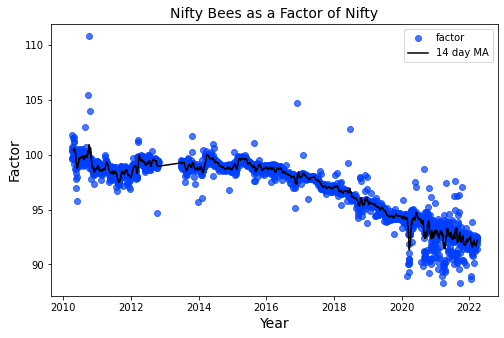

In [32]:
y = merged['Typical_Factor']
x = merged.index
plt.scatter(x, y, alpha=0.7, label='factor')
plt.plot(merged[f'SMA_{n}'], color='black', label=f"{n} day MA")
plt.legend()
plt.title('Nifty Bees as a Factor of Nifty',fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Factor",fontsize=14)
#plt.savefig('SS.png')
plt.show()

In [33]:
#(merged['Typical_Factor']).std()
#(merged['Typical_Factor']).mean()

In [34]:
merged['Number'] = np.arange(len(merged))
merged['Number'] = merged['Number']+1
corr = merged['Typical_Factor'].corr(merged['Number'])
# Correlation With time
print(f"Correlation with Time {corr}")

Correlation with Time -0.8678772562670067


<p style="font-size:16px; color:#000099">  - The project is still Ongoing. The next steps will be to analyze NiftyBEES w.r.t India Vix <br>
- That might give us some important insights</p>